In [9]:
# plot recall and sharpness for different EMDB emmernet maps 
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Collect the data

map_sharpness_pickle_file = "/home/abharadwaj1/papers/elife_paper/figure_information/scripts/jupyter_notebooks/quality_metrics/map_sharpness_scores.pkl"
results_sharpness = pd.read_pickle(map_sharpness_pickle_file)

recall_statistics_pickle_file = "/home/abharadwaj1/papers/elife_paper/figure_information/scripts/jupyter_notebooks/quality_metrics/recall_scores_epsilon_dataset.pkl"
recall_stats = pd.read_pickle(recall_statistics_pickle_file)

In [10]:
recall_stats[0].keys()

dict_keys(['emdb_pdb', 'mb_locscale_recall', 'mf_locscale_recall', 'hybrid_locscale_recall', 'emmernet_hybrid_recall', 'emmernet_MB_recall', 'mb_locscale_precision', 'mf_locscale_precision', 'hybrid_locscale_precision', 'emmernet_hybrid_precision', 'emmernet_MB_precision'])

In [13]:
emdb_results_combined = {}
for i in range(len(results_sharpness)):
    result_sharpness_emdb = results_sharpness[i]
    result_recall_emdb = recall_stats[i]

    emdb_pdb_sharpness = result_sharpness_emdb["emdb_pdb"]
    emdb_pdb_recall = result_recall_emdb["emdb_pdb"]

    assert emdb_pdb_sharpness == emdb_pdb_recall

    rscc_metric_emmernet_hybrid = result_sharpness_emdb["rscc"]["emmernet_hybrid_map"]
    rscc_metric_emmernet_MB = result_sharpness_emdb["rscc"]["emmernet_MB_map"]

    recall_emmernet_hybrid = result_recall_emdb["emmernet_hybrid_recall"]
    recall_emmernet_MB = result_recall_emdb["emmernet_MB_recall"]

    emdb_results_combined[emdb_pdb_recall] = {
        "p1" : (rscc_metric_emmernet_hybrid, recall_emmernet_hybrid),
        "p2" : (rscc_metric_emmernet_MB, recall_emmernet_MB),
    }

In [14]:
point_group_1 = []
point_group_2 = []
for emdb_pdb in emdb_results_combined.keys():
    point_group_1.append(emdb_results_combined[emdb_pdb]["p1"])
    point_group_2.append(emdb_results_combined[emdb_pdb]["p2"])

# plot a 2D scatter plot of the data
# x-axis: rscc
# y-axis: recall
# color: red for emmernet_hybrid, blue for emmernet_MB
  

/home/abharadwaj1/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/home/abharadwaj1/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


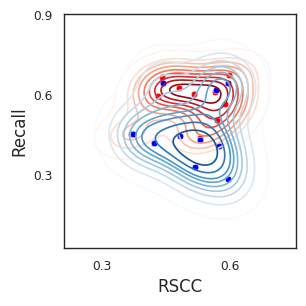

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

figsize_cm = (8, 8)
figsize_inches = (figsize_cm[0]/2.54, figsize_cm[1]/2.54)
font = "Helvetica"
fontsize = 12
sns.set(font=font, font_scale=1.0, style="white")
sns.set_context("paper")

fig, ax = plt.subplots(figsize=figsize_inches)
sns.kdeplot(x=[x[0] for x in point_group_1], y=[x[1] for x in point_group_1], cmap="Reds", shade=False, shade_lowest=False, ax=ax)
sns.kdeplot(x=[x[0] for x in point_group_2], y=[x[1] for x in point_group_2], cmap="Blues", shade=False, shade_lowest=False, ax=ax)
sns.scatterplot(x=[x[0] for x in point_group_1], y=[x[1] for x in point_group_1], color="red", ax=ax)
sns.scatterplot(x=[x[0] for x in point_group_2], y=[x[1] for x in point_group_2], color="blue", ax=ax)

ax.set_xlabel("RSCC", fontsize=fontsize)
ax.set_ylabel("Recall", fontsize=fontsize)

plt.tight_layout()
ax.set_xticks([0.3, 0.6], fontsize=fontsize)
ax.set_yticks([0.3, 0.6, 0.9], fontsize=fontsize)
plt.savefig("recall_vs_rscc.pdf", dpi=600)